# Bagging and Pasting

## Setup

In [2]:
import os
if os.getcwd().endswith("notebooks"):
    os.chdir('..')

print("Current working directory: ", os.getcwd())
if not os.getcwd().endswith("Ensemble-Learning-Notebooks"):
    raise ValueError("Please change working directory to 'path/Ensemble-Learning-Notebooks' before proceeding")

Current working directory:  /Users/irellzane/MLprojects/Ensemble-Learning-Notebooks


In [3]:
!pip install -r requirements.txt

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data Generation

In [85]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml

X, y = make_moons(n_samples=500, noise=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [91]:
mnist = fetch_openml("mnist_784", as_frame=False)

## Train Bagging Classifier

In [41]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500,
                            max_samples=100, n_jobs=-1, random_state=42)

bag_clf.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=500, n_jobs=-1, random_state=42)

## Pasting

In [ ]:
paste_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500,
                              bootstrap=False, max_samples=100, n_jobs=-1, random_state=42)

## Analysis

In [72]:

tree_clf = DecisionTreeClassifier(random_state=42)

paste_clf.fit(X_train, y_train)
tree_clf.fit(X_train, y_train)

print("Bagging = ", bag_clf.score(X_test, y_test))
print("Pasting = ", paste_clf.score(X_test, y_test))
print("Decision Tree = ", tree_clf.score(X_test, y_test))

Bagging =  0.904
Pasting =  0.92
Decision Tree =  0.856


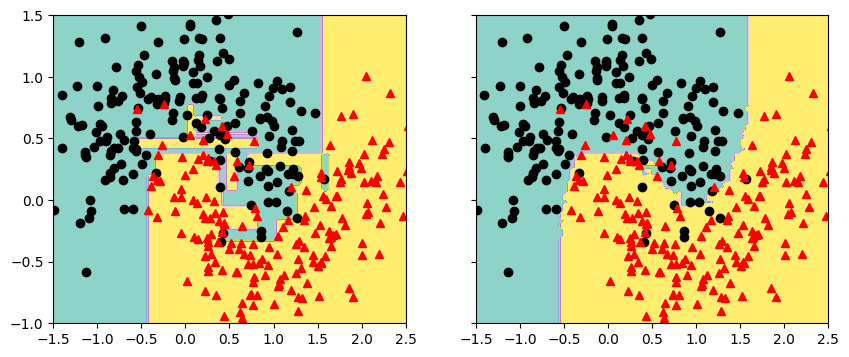

In [73]:

x1s = np.linspace(-1.5, 2.5, 100)
x2s = np.linspace(-1, 1.5, 100)

x1_mesh, x2_mesh = np.meshgrid(x1s, x2s)
X_coords = np.c_[x1_mesh.ravel(), x2_mesh.ravel()]

fig, axs = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

for ax, predictor in zip(axs, [tree_clf, bag_clf]):
    plt.sca(ax)
    plt.plot(X_train[:, 0][y_train==0], X_train[:, 1][y_train==0], "ko")
    plt.plot(X_train[:, 0][y_train==1], X_train[:, 1][y_train==1], "r^")
    y_pred = predictor.predict(X_coords).reshape(x1_mesh.shape)
    plt.contourf(x1_mesh, x2_mesh, y_pred, cmap="Set3")
    plt.axis([-1.5, 2.5, -1, 1.5])
plt.show()

## Out of Bag Evaluation

In [74]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500,
                            oob_score=True, n_jobs=-1, random_state=42)

bag_clf.fit(X_train, y_train)

bag_clf.oob_score_

0.896

In [75]:
bag_clf.score(X_test, y_test)

0.912

## OOB decision Function

In [76]:
bag_clf.oob_decision_function_[:3]

array([[0.32352941, 0.67647059],
       [0.3375    , 0.6625    ],
       [1.        , 0.        ]])

## Random Patches

In [90]:
X_mnist_train, X_mnist_test, y_mnist_train, y_mnist_test = train_test_split(mnist.data, mnist.target, random_state=42)

In [94]:
rp_bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=50, max_samples=0.3, oob_score=True,
                               bootstrap_features=True, max_features=0.3, random_state=42, n_jobs=-1)

rp_bag_clf.fit(X_mnist_train, y_mnist_train)

BaggingClassifier(bootstrap_features=True, estimator=DecisionTreeClassifier(),
                  max_features=0.3, max_samples=0.3, n_estimators=50, n_jobs=-1,
                  oob_score=True, random_state=42)

In [95]:
rp_bag_clf.oob_score_

0.9550857142857143

## Random Subspaces

In [100]:
rs_bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=50, bootstrap=False, max_samples=1.0,
                               bootstrap_features=True, max_features=0.2, random_state=42, n_jobs=-1)

rs_bag_clf.fit(X_mnist_train, y_mnist_train)

BaggingClassifier(bootstrap=False, bootstrap_features=True,
                  estimator=DecisionTreeClassifier(), max_features=0.2,
                  n_estimators=50, n_jobs=-1, random_state=42)

In [101]:
rs_bag_clf.score(X_mnist_test, y_mnist_test)

0.9676571428571429